# Week 5

# Weekly 5

1.  Multicollinearity
2.  Variable selection
3.  Shrinkage Estimators


Packages we will require this week

In [2]:
packages <- c(
    "ISLR2",
    "dplyr",
    "tidyr",
    "readr",
    "purrr",
    "glmnet",
    "caret",
    "car",
    "corrplot",
    "repr",
    "glmnet",
    "caret",
    "repr",
    "torch",
    "mlbench"
)

#renv::install(packages)
sapply(packages, require, character.only=TRUE)

Loading required package: ISLR2

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: readr

Loading required package: purrr

Loading required package: glmnet

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-4

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:purrr':

    some


The following object is masked from 'package:dplyr':

    recode


Loading

ISLR2    dplyr    tidyr    readr    purrr   glmnet    caret      car 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
corrplot     repr   glmnet    caret     repr    torch  mlbench 
    TRUE     TRUE     TRUE     TRUE     TRUE    FALSE    FALSE

In [3]:
library(tidyr)
library(readr)
library(purrr)
library(glmnet)
library(caret)
library(car)
# renv::install(packages)
# lapply(packages, require, character.only = TRUE)

In this class, we are going to look at variable selection. Consider
theBoston housing dataset which is described here:

In [6]:
library(ISLR2)
attach(Boston)

In [13]:

df <- Boston
help(Boston)
df$chas <- factor(df$chas)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


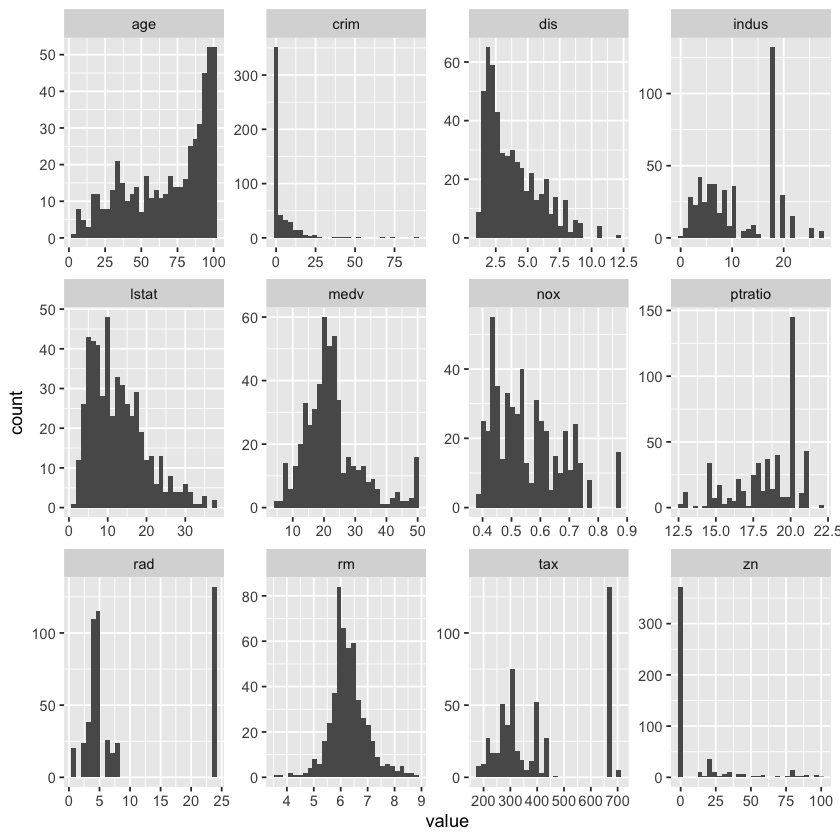

In [21]:

plot_prepare <- df %>% 
    keep(is.numeric) %>%
    gather() 
plot_prepare %>%
    ggplot(aes(value)) + geom_histogram() + facet_wrap(~key, scales = "free")

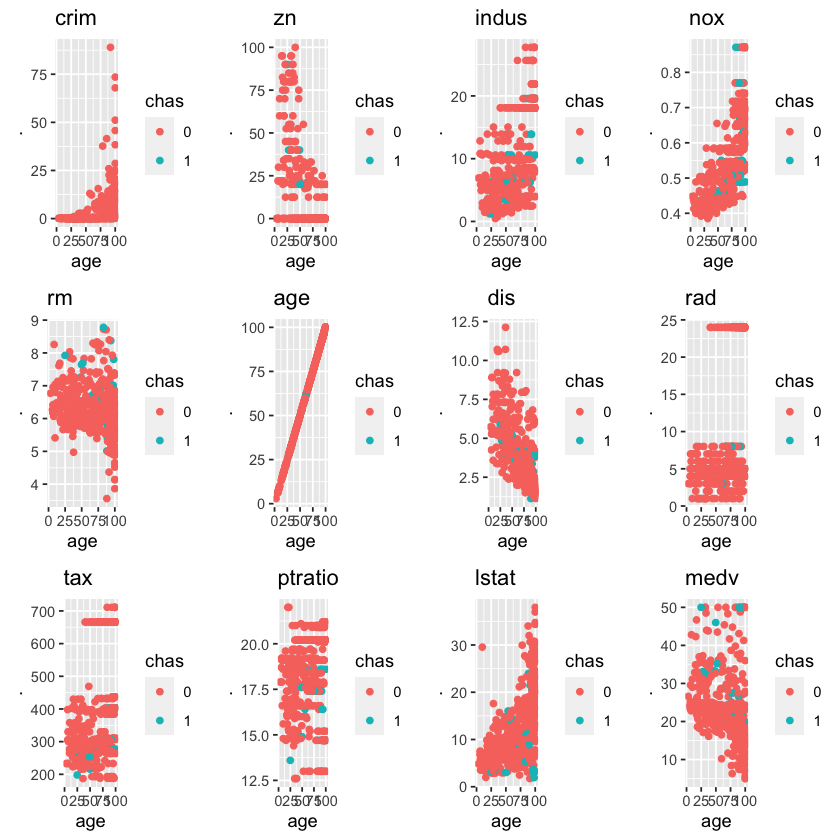

In [31]:

# df %>% 
#     select(c(age, tax, rm)) %>%
#     map2(.,colnames(.), ~{
#         ggplot(df) +
#         geom_point(aes(x=age, y=.))+
#         ggtitle(as.character(.y))
#         }
#     ) %>%
#     cowplot::plot_grid(plotlist=.)



df %>% 
    select(is.numeric) %>%
    map2(.,colnames(.), ~{
        ggplot(df) +
        geom_point(aes(x=age, y=.,color = chas))+
        ggtitle(as.character(.y))
        }
    ) %>%
    cowplot::plot_grid(plotlist=.)

In [35]:
help(Boston)
full_mod <- lm(medv ~ ., data=df)
summary(full_mod)

broom::tidy(full_mod)


Call:
lm(formula = medv ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas1         2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Re

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),41.617270176,4.936039480,8.4313082,3.794467e-16
crim,-0.121388618,0.033000398,-3.6783987,2.605302e-04
zn,0.046963463,0.013879116,3.3837503,7.719966e-04
indus,0.013467695,0.062144709,0.2167151,8.285201e-01
chas1,2.839993383,0.870007273,3.2643329,1.173458e-03
nox,-18.758022005,3.851354657,-4.8704998,1.502073e-06
rm,3.658119042,0.420245745,8.7047140,4.808025e-17
age,0.003610711,0.013329437,0.2708825,7.865948e-01
dis,-1.490753650,0.201622698,-7.3937789,6.170894e-13


Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

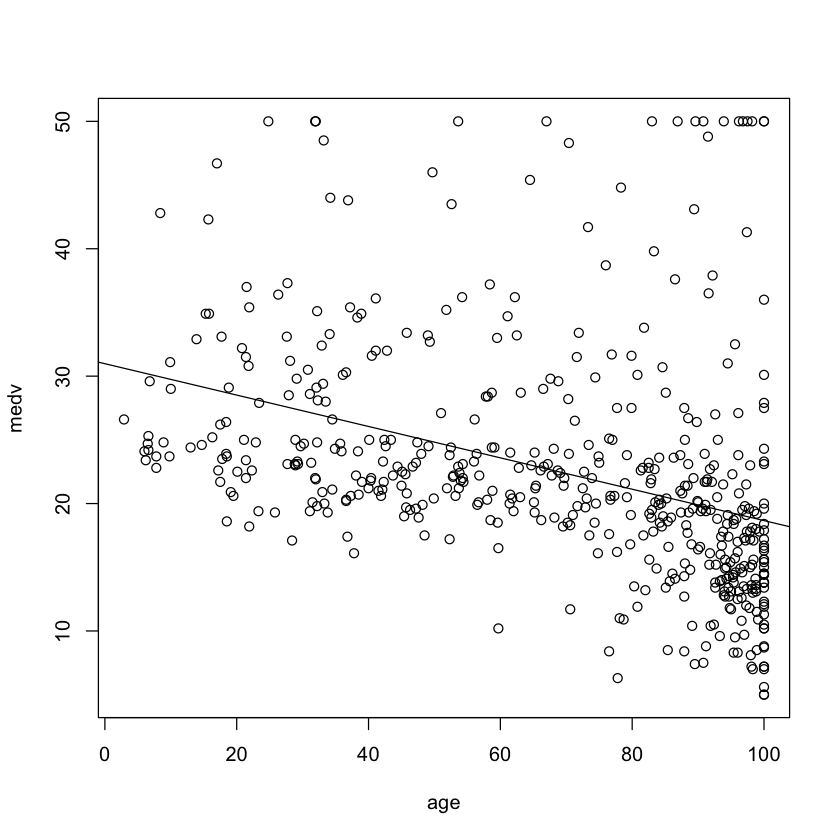

In [37]:
plot(medv ~ age, df)
abline(lm(medv ~ age, df))

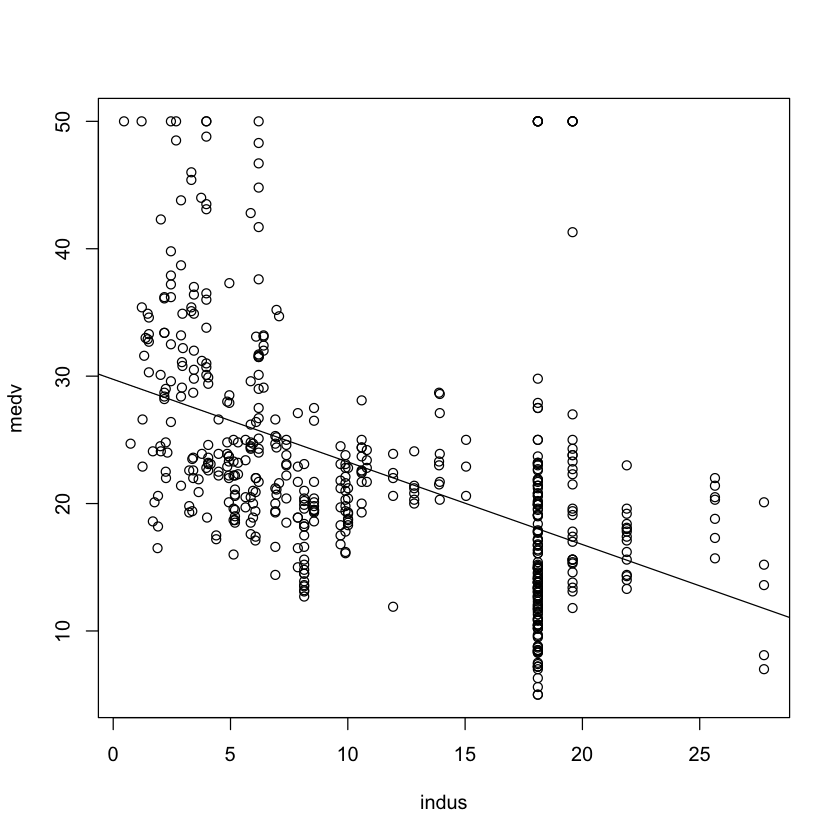

In [38]:
plot(medv ~ indus, df)
abline(lm(medv ~ indus, df))

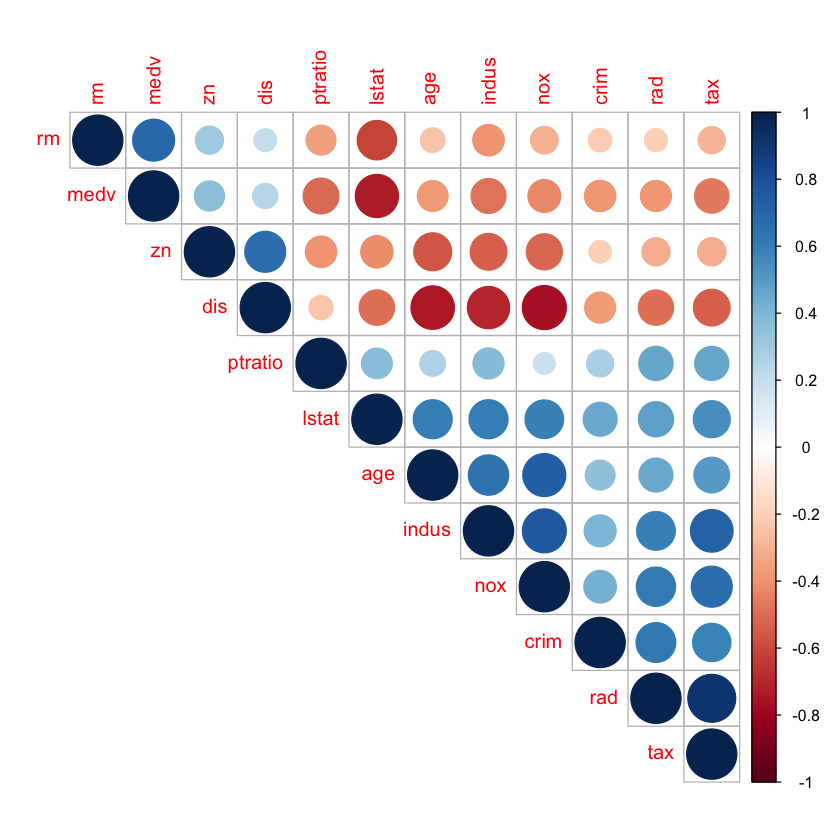

In [43]:
corrTable <- df %>% keep(is.numeric) %>% cor()
library(corrplot)
corrplot(corrTable, type="upper", order="hclust")

# Stepwise regression

In [44]:
nullmodel <- lm(medv ~ 1, df)
fullmodel <- lm(medv ~ ., df)
library(caret)
forward_select <- step(nullmodel, direction = "forward", scope = formula(fullmodel))

Start:  AIC=2246.51
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   23243.9 19472 1851.0
+ rm       1   20654.4 22062 1914.2
+ ptratio  1   11014.3 31702 2097.6
+ indus    1    9995.2 32721 2113.6
+ tax      1    9377.3 33339 2123.1
+ nox      1    7800.1 34916 2146.5
+ crim     1    6440.8 36276 2165.8
+ rad      1    6221.1 36495 2168.9
+ age      1    6069.8 36647 2171.0
+ zn       1    5549.7 37167 2178.1
+ dis      1    2668.2 40048 2215.9
+ chas     1    1312.1 41404 2232.7
<none>                 42716 2246.5

Step:  AIC=1851.01
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    4033.1 15439 1735.6
+ ptratio  1    2670.1 16802 1778.4
+ chas     1     786.3 18686 1832.2
+ dis      1     772.4 18700 1832.5
+ age      1     304.3 19168 1845.0
+ tax      1     274.4 19198 1845.8
+ zn       1     160.3 19312 1848.8
+ crim     1     146.9 19325 1849.2
+ indus    1      98.7 19374 1850.4
<none>                 19472 1851.0
+ rad      1      25.1 19447 1852.4


In [46]:
nullmodel <- lm(medv ~ 1, df)
fullmodel <- lm(medv ~ ., df)
library(caret)
backward_select <- step(fullmodel, direction = "backward", scope = formula(fullmodel))

Start:  AIC=1599.85
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      1.08 11350 1597.9
- age      1      1.69 11351 1597.9
<none>                 11349 1599.8
- chas     1    245.31 11595 1608.7
- tax      1    256.28 11606 1609.2
- zn       1    263.59 11613 1609.5
- crim     1    311.49 11661 1611.6
- rad      1    430.71 11780 1616.7
- nox      1    546.10 11896 1621.6
- ptratio  1   1157.70 12507 1647.0
- dis      1   1258.52 12608 1651.1
- rm       1   1744.36 13094 1670.2
- lstat    1   2733.54 14083 1707.0

Step:  AIC=1597.9
medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + 
    ptratio + lstat

          Df Sum of Sq   RSS    AIC
- age      1      1.69 11352 1596.0
<none>                 11350 1597.9
- chas     1    251.21 11602 1607.0
- zn       1    262.99 11614 1607.5
- tax      1    299.68 11650 1609.1
- crim     1    313.07 11664 1609.7
- rad      1    453.61 11804 16

The attach() function in R is used to make an object part of the search
path. In this case, Boston is a built-in data frame in R, containing
data on housing values in suburbs of Boston. The attach(Boston) function
makes this data frame part of the search path, allowing the user to
refer to its variables by name (e.g., medv, rm, nox,rad) without having
to type the data frame name Boston\$ before each variable name.

**Explanation of the variables**

The original data are 506 observations on 14 variables, medv being the
target variable:

-   crimper capita crime rate by town
-   znproportion of residential land zoned for lots over 25,000sq.ft
-   indusproportion of non-retail business acres per town.
-   chasCharles River dummy variable( =1 if tract bounds river; 0
    otherwise)
-   noxnitric oxides concentration (parts per 10 million)
-   rmaverage number of rooms per dwelling
-   ageproportion of owner-occupied units built prior to 1940
-   disweighted distance to five Boston employment centres
-   radindex of accessibility to radial highways
-   taxfull-value property-tax rate per USD 10,
-   ptratiopupil-teacher ratio by town
-   lstatpercentage of lower status of the population
-   medvmedian value of owner occupied homes in USD 1000’s

### EDA:

**Histograms**

# Use facet_wrap() to display each histogram in a

# separate panel, with the key values used to split the

# data into the separate panels.

The result above is a set of histograms, one for each numeric variable
in the original data frame, with the values of that variable on the
x-axis and the frequency of those values on the y-axis. The histograms
are displayed in separate panels, allowing us to easily compare the
distribution of each variable. NOTE:- 1) **%\>%** is a pipe operator in
R that allows you to chain multiple functions together. It takes the
output of the previous function and passes it as the first argument of
the next function. This allows for a more concise and readable way of
writing code, especially for data manipulation and analysis.

1.  In the **facet_wrap()** function, **scales = ‘free’** allows each
    facet to have different scales on the y-axis, meaning that the range
    of values shown on the y-axis can vary for each facet based on the
    actual range of values in that facet, instead of having the same
    y-axis scale for all facets. This is useful when the range of values
    in different facets varies greatly and it is diﬀicult to see the
    details of each facet due to the use of a fixed scale

**Boxplot of the variables**

ERROR: Error in df %>% select(-chas) %>% gather(key, val, -medv) %>% ggplot(aes(x = val, : could not find function "%>%"


The resulting plot shows the relationship between **medv** and each of
the other variables in the data frame, with a linear regression line
overlaid on each scatter plot. The transparency of the points allows for
better visualization of overlapping points, and the use of
**facet_wrap** allows for easy comparison of the relationships across
the different variables. The **scales = “free”** argument ensures that
the y-axis scales are different for each panel, to avoid distortion
caused by differences in range of the **medv** variable.

**Regression Model**

We begin by creating a regression model to predictmedvusing all the
predictors:


Call:
lm(formula = medv ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas          2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Re

# A tibble: 13 × 5
   term         estimate std.error statistic  p.value
   <chr>           <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)  41.6       4.94        8.43  3.79e-16
 2 crim         -0.121     0.0330     -3.68  2.61e- 4
 3 zn            0.0470    0.0139      3.38  7.72e- 4
 4 indus         0.0135    0.0621      0.217 8.29e- 1
 5 chas          2.84      0.870       3.26  1.17e- 3
 6 nox         -18.8       3.85       -4.87  1.50e- 6
 7 rm            3.66      0.420       8.70  4.81e-17
 8 age           0.00361   0.0133      0.271 7.87e- 1
 9 dis          -1.49      0.202      -7.39  6.17e-13
10 rad           0.289     0.0669      4.33  1.84e- 5
11 tax          -0.0127    0.00380    -3.34  9.12e- 4
12 ptratio      -0.938     0.132      -7.09  4.63e-12
13 lstat        -0.552     0.0507    -10.9   6.39e-25

We can see that most of the variables are significant. However, notably
ageandindusare not significant predictors of medv

Is this true?

    #model_age <- lm(medv ~ age, df)
    #summary(model_age)

NOTE:- Since the 2 10^-16 is significant and favours the alternate
hypothesis as 2 10 ^-16 is smaller than 0.05. If the p-value is less
than 0.05 you can reject the null hypothesis favouring the alternate
hypothesis which means that the p-value is significant (less than 0.05).
On the other hand, if the p-value is greater than 0.05, then we cannot
reject the null hypothesis. We observe that the p-value for age is
0.786595 which is above 0.5. Hence, the null hypothesis cannot be
rejected, the p-value ultimately favoring the null hypothesis.

This code uses the **corrplot** package to create a visualization of the
correlation matrix **R**. The **type** argument specifies which part of
the correlation matrix to display, and **upper** displays

only the upper triangle. The **order** argument specifies the order of
the variables in the plot and **hclust** orders them according to
hierarchical clustering. The resulting plot displays a color-coded
matrix with the correlations between each pair of variables, where red
indicates positive correlation, blue indicates negative correlation, and
white indicates no correlation.


Call:
lm(formula = medv ~ ., data = df %>% select(-c(indus, nox, dis)))

Residuals:
     Min       1Q   Median       3Q      Max 
-16.9388  -3.0974  -0.7082   1.8472  28.3443 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.655695   4.215323   5.137 4.01e-07 ***
crim        -0.091908   0.034722  -2.647 0.008380 ** 
zn           0.008794   0.012670   0.694 0.487957    
chas         2.952830   0.913519   3.232 0.001309 ** 
rm           4.100202   0.439135   9.337  < 2e-16 ***
age          0.020892   0.012195   1.713 0.087315 .  
rad          0.251852   0.067890   3.710 0.000231 ***
tax         -0.012434   0.003469  -3.584 0.000371 ***
ptratio     -0.886594   0.129206  -6.862 2.03e-11 ***
lstat       -0.573951   0.053177 -10.793  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.084 on 496 degrees of freedom
Multiple R-squared:  0.6999,    Adjusted R-squared:  0.6944 
F-statistic: 128.5 on 9 and 

**Variance Inflation Factors**

Variance inflation factor (VIF) is a measure of the extent to which the
variance of the estimated regression coefficient is increased due to
the presence of correlation among the predictor variables in a multiple
regression model. Specifically, VIF measures how much the variance of
the estimated regression coeﬀicient of each independent variable is
increased due to the correlation with other independent variables in the
model. VIF values greater than 1 indicate that the variance of the
estimated regression coeﬀicient is increased due to multicollinearity.
Typically, VIF values greater than 5 or 10 are considered to be of
concern.

This code calculates the variance inflation factor (VIF) for each
predictor variable in a linear regression model with the response
variable **medv**. The **car** package is loaded, and the **vif()**
function is applied to a linear regression model **vif_model** that uses
all the predictor variables

in the **df** data frame. The **%\>%** operator is used to pass the VIF
results to the **knitr::kable()** function, which formats the output as
a table.

NOTE:- Under variance inflation. If the standard error goes up then the
significance value of the null hypothesis goes up. Anything greater than
2 is considered high variance inflation and low otherwise.

**Stepwise Regression**

**null_model** is fitting a linear regression model with only an
intercept term, meaning that it assumes the response variable **medv**
is not associated with any of the predictor variables in the data frame
**df**.

**full_model** is fitting a multiple linear regression model, where the
response variable **medv** is modeled as a linear combination of all the
predictor variables in the data frame **df**.

The code is performing forward stepwise selection using the **step()**
function from the **caret** package. It starts with a null model
**null_model** which only includes the intercept term and progressively
adds one predictor at a time, based on the **direction = “forward”**
argument. The set of candidate models considered is restricted by the
**scope** argument, which specifies the full model **full_model**.
Finally, **summary(forward_model)** provides a summary of the model
selected by the forward stepwise selection.

AIC stands for Akaike Information Criterion. It is a measure of the
quality of a statistical model, relative to other models for the same
data. AIC estimates the relative amount of information lost by a given
model, while taking into account the number of parameters used by the
model. The model with the lowest AIC is generally preferred, as it is
expected to have the best predictive power. AIC is the measure of the
fitness of the regression model similar to R square. A low AIC score is
selected and then keep subsequently adding low AIC score values till you
reach a stage when including any of the other variables, AIC then goes
up. Hence, we stop where the AIC score is lowest, known as forward
selection.

##

The **step()** function is used for stepwise regression. The
**backward_model** is obtained by applying backward stepwise regression
on the **full_model**. In backward stepwise regression, the function
starts with a model that includes all the predictor variables and
removes the predictor with the highest p-value one by one until all the
remaining variables have p-values below a certain significance level
(usually 0.05).

Backward selection - U start with a Full model. Exclude the lowest AIC
score variable so that AIC stays small. And when u subsequently exclude
the variables there will come a time when the AIC value might increase
hence the best stopping time is when excluding variables we have the
lowest AIC variable

In the provided code, **step()** function is used to perform a stepwise
regression with both forward and backward selection. The **full_model**
is specified as the scope of the search, meaning that all predictor
variables will be considered.The resulting **selected_model** is the
selected_model selected by the stepwise regression, with the best subset
of predictor variables found by the search.